# Pythonopdracht - Programming for Data Science - Jelle van Barneveld

## Installatie- en gebruiksinstructies

Om dit notebook succesvol te kunnen runnen dien je de volgende stappen te ondernemen. Hierbij gaat men ervan uit dat het script geraadpleegd wordt door een Windows-apparaat.
- Open Google Chrome en klik op de drie puntjes bovenaan. Ga via "Help" naar "Over Google Chrome". Je ziet een versienummer, onthoud de cijfers t/m de eerste punt.
- Ga naar https://chromedriver.chromium.org/downloads en klik op het onthouden versienummer. Kies voor de Windowsversie, download de zipmap en pak deze uit. Verplaats de applicatie "chromedriver" naar C:\Program Files (x86)

Als het goed is runnen na het doorlopen van deze stappen de onderstaande 2 codeblokken succesvol. Zij vormen dus een goede test om te kijken of de installatiestappen goed zijn uitgevoerd, en bevatten tegelijkertijd benodigdheden om de rest van de code te kunnen runnen.

Twee laatste kleine aandachtspunten bij het doorlopen van dit script:
- Er zal je eenmalig via een prompt om een getal gevraagd worden. Vergeet deze niet in te voeren, anders loopt het script niet door.
- Zorg er altijd voor dat je een actieve internetverbinding hebt gedurende de tijd dat het script doorloopt.

In [1]:
import pandas as pd
import requests
import logging
import datetime
import geopandas
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

from bokeh.plotting import figure, show
from bokeh.models import LogColorMapper, ColumnDataSource
from bokeh.palettes import RdYlGn as correct_palette

## Fase 1: Business Understanding

### 1a: Aanleiding

Iedere zomer ga ik met ongeveer zeven a acht vrienden op vakantie in Nederland, we huren dan altijd een huisje. Op internet zoeken we een aantal maanden voor de schoolvakantie een huisje dat ons hiervoor geschikt lijkt. Elk van ons controleert deze geschiktheid volgens andere eisen. Grofweg kunnen deze in 2 categorieën worden opgedeeld:
- Eisen aan het huisje zelf: denk aan aantallen slaapkamers, WiFi-mogelijkheden, enzovoort. Deze informatie wordt aangeboden door de website natuurhuisje.nl.
- Eisen aan de omgeving van het huisje: dit omvat de aanwezigheid van een supermarkt en verschillende activiteiten, bijvoorbeeld pretparken, zwembaden, klimbossen, enzovoort. Deze informatie halen we voor het grootste gedeelte uit Google Maps.

Het zoekproces om een huisje te vinden dat aan alle eisen voldoet is tijdrovend: gemiddeld doen we er twee weken over om te beslissen wat het meest geschikte huisje is. Dit wordt met name veroorzaakt door het feit dat we niet weten wat binnen Nederland het meest aantrekkelijke zoekgebied is: om provinciale verschillen te achterhalen moeten we, zoals eerder vermeld, meerdere websites raadplegen. In dit beslisproces moeten we dus continu switchen tussen huisjes- en uitjesinformatie per provincie en daarbij zeer alert zijn op alle voorwaarden die we hebben gesteld.

### 1b: Het onderzoek: hoofd- en deelvragen

Dit script is geschreven om (de hiaten in de) bovengenoemde situatie te verbeteren door het beantwoorden van de volgende hoofdvraag: <b>"In welke provincie kan je het beste een huisje huren?"</b>. Hierdoor krijgen we snel inzicht in zowel de huisjes- als omgevingsverschillen per provincie, zodat we het "zoekgebied" kleiner kunnen maken ter verkleining van de zoektijd.

Om ervoor te zorgen dat het antwoord van deze vraag volledig volgens meerdere criteria beantwoord wordt, is deze opgesplitst in 4 deelvragen:
- In welke provincie staan de meeste huisjes?
- In welke provincie staan de huisjes met de laagste gemiddelde afstand tot een supermarkt?
- In welke provincie staan de huisjes met de laagste gemiddelde afstand tot een zwembad?
- In welke provincie staan de huisjes met de laagste gemiddelde afstand tot een attractie?

Voor de eerste deelvraag wordt de hypothese gesteld dat het antwoord "Noord-Holland" is, aangezien deze op nr. 1 staat in de ranglijst grootste Nederlandse provincies (zie ook https://machtig.nl/grootste-provincie-van-nederland-oppervlakte-inwoners/, laatst geraadpleegd op 27-06-2023). Hierbij wordt dus de aanname gedaan dat de grootte van de provincie correleert met het aantal huisjes dat daar staat.

Voor de andere drie deelvragen wordt de hypothese gesteld dat het antwoord "Zuid-Holland" is, aangezien dit de meest "levendige" provincies zijn (ze hebben de grootste Nederlandse steden, zijn het beste bereikbaar, enzovoort). Hierbij wordt er dus vanuit gegaan dat de levendigheid van een provincie uitmaakt voor de afstanden tot voorzieningen, uitgaansgelegenheden, attracties en andersoortige uitjes.

### 1c: Doelstelling

Met het geschreven script wil men het bovengenoemde zoek- en beslisproces om een huisje te vinden dat aan alle voorwaarden voldoet met de helft (een week) te verminderen. Doordat provinciale verschillen snel zichtbaar worden door een allesomvattende dataset, en er dus niet meer geschakeld hoeft te worden tussen verschillende websites, kunnen er naar verwachting sneller huisjes gevonden en gekeurd worden.

### 1d: Fasering & aanpak

Voor het grootste gedeelte van deze opdracht zijn de stappen van het veelgebruikte CRISP-DM-procesmodel (Cross-industry Stand Process for Data Mining): op een "watervalwijze" doorlopen. Dit houdt in dat per projectfase een CRISP-DM-fase werd uitgevoerd. In het onderstaande plaatje wordt dit visueel weergegeven: in de eerste fase wordt bijvoorbeeld alles gedaan van Business Understanding, in de tweede fase alle activiteiten die bij Data Understanding horen, enzovoort.

<img src="CRISP DM Waterval.PNG" alt="CRISP DM Waterval" />

Bij de afweging tussen de watervalaanpak en een Agile-aanpak is er volgens de richtlijnen van de Ralph-Staceymatrix (zie hieronder) uiteindelijk voor deze eerste gekozen om twee redenen:
- De gebruikte technieken waren van tevoren al bekend (namelijk Python-only) en ook zij zijn niet veranderd in de loop der tijd. Weliswaar moest men een aantal onbekende Python-packages gebruiken (selenium, bokeh, enzovoort), maar hier was voldoende informatie over te vinden op het internet. In de Ralph-Staceymatrix positioneerde dit project zich dus links op de horizontale as.
- De tijdens "Business Understanding" geïnventariseerde eisen bleven gedurende dit hele traject ongewijzigd. In de Ralph-Staceymatrix positioneerde dit project zich dus laag op de verticale as.

<img src="Ralph Stacey.png" alt="Ralph-staceymatrix" />

Hieronder volgt per CRISP-DM-stap een globale beschrijving van de toepassingswijze binnen de projectfasen:
- <b>Fase 1: Business Understanding:</b> er is een aanleiding, opdracht en doelstelling geformuleerd, waarmee men de toegevoegde waarde van dit project rechtvaardigt.
- <b>Fase 2: Data Understanding:</b> in deze tweede fase is er data gelokaliseerd d.m.v. het verzamelen van handige databronnen (een website, een API & een gedownload geojson-bestand) die elk veel informatie bevatten. Wat de website (natuurhuisje.nl) betreft zijn d.m.v. de "Inspecteren"-optie van Google Chrome de relevante achterliggende HTML-structuren geanalyseerd, om vast te stellen naar welke elementen Python moet zoeken voor het verkrijgen van de juiste informatie.
- <b>Fase 3: Data Preparation:</b> hier wordt de relevante geïnventariseerde data daadwerkelijk opgehaald en in een dataset gezet. Het bewaken van de volledigheid en integriteit van de data staat hierbij centraal: continu wordt de uiteindelijke dataset in Visual Studio Code vergeleken met bijvoorbeeld webpagina's in Chrome om vast te stellen of álle en de júiste data goed overgekomen zijn.
- <b>Fase 4: Evaluation & Deployment:</b> hier worden in o.a. een interactieve kaart visuele analysetechnieken gecombineerd om de betreffende deelvragen, en daarmee de hoofdvraag, te beantwoorden. Hierbij wordt zoveel mogelijk geprobeerd om de gestelde hypotheses te ontkrachten: je mag er immers pas vanuit gaan dat iets waar is, als je het tegendeel niet meer kan bewijzen. De gemaakte kaart wordt gepresenteerd in een HTML-bestand dat de gebruiker naar eigen inzicht kan raadplegen.

De CRISP-DM-fase "Modelling" is in dit project buiten beschouwing gelaten, omdat er geen Machine-Learningtechnieken zijn toegepast.

## Fase 2: Data Understanding

### 2a: De natuurhuisjes op zich

In [2]:
while(True):
    
    try:
        aantal_resultaten_per_pagina = 20 #Deze staat vast op natuurhuisje.nl
        geschat_aantal_minuten_per_pagina = 0.25
        aantal_paginas = int(input("Hoeveel pagina's wil je inlezen? Elke pagina bevat " + str(aantal_resultaten_per_pagina) + " huisjes en duurt ongeveer " + str(geschat_aantal_minuten_per_pagina) + " minuten om in te lezen"))
        
        totaal_aantal_huisjes = aantal_paginas * aantal_resultaten_per_pagina
        geschatte_tijdsduur_totaal = aantal_paginas * geschat_aantal_minuten_per_pagina

        print("Er zullen " + str(aantal_paginas) + " pagina's ingelezen worden, wat resulteert in " + str(totaal_aantal_huisjes) + " in de dataset. Dit zal ongeveer " + str(geschatte_tijdsduur_totaal) + " minuten kosten.")
        print("Wil je het laadproces tussentijds afbreken? Sluit de Chrome Webviewer, die zichzelf opent aan het begin van het laadproces, dan af.")
        
        break
    except ValueError:
        print("Voer een geheel getal in!")

Er zullen 1 pagina's ingelezen worden, wat resulteert in 20 in de dataset. Dit zal ongeveer 0.25 minuten kosten.
Wil je het laadproces tussentijds afbreken? Sluit de Chrome Webviewer, die zichzelf opent aan het begin van het laadproces, dan af.


De gebruiker wordt gevraagd een aantal webpagina's in te vullen om in te lezen: elke pagina bevat 20 huisjes om toe te voegen aan de dataset. Als de gebruiker iets anders dan een getal invult krijgt hij/zij een boodschap dat er toch echt een <b>geheel getal</b> ingevoerd moet worden. Zolang de gebruiker dit niet doet gaat het programma niet verder, als de input dan uiteindelijk <b>wel</b>klopt worden de volgende codeblokken uitgevoerd.

In [3]:
# logger = logging.getLogger(__name__)
# logger.setLevel(logging.DEBUG)

# file_handler = logging.FileHandler('logs.txt', mode = 'w')
# file_handler.setLevel(logging.DEBUG)

# logger.addHandler(file_handler)

#TODO later aanpassen naar loguru

Bij het inlaadproces is het de bedoeling dat er logs worden gegenereerd en weggeschreven naar een bestand, dat door dit Notebook zelf aangemaakt wordt ('logs.txt'). De bovenstaande code initialiseert deze logger.

In [4]:
aantal_verwerkte_huisjes = 0
df_lijst = []

Tijdens het doorlopen van het laadproces zal het aantal verwerkte huisjes bijgehouden en na elk huisje geüpdate worden. Daarom wordt deze nu alvast geïnitaliseerd. Ditzelfde geldt voor de lijst met dataframes die tijdens het laadproces gevuld zal worden (één dataframe per doorlopen pagina met zoekresultaten).

In [5]:
def get_contents_off_all_single_valued_tags(soup: BeautifulSoup) -> list:
    name = soup.find_all("h1", {"class" : "nh-detail__header__title"})[0].text
    village_country = soup.find_all("h2", {"class" : "nh-detail__header__subtitle"})[0].text
    features = soup.find_all("div", {"class" : "nh-detail__header__details"})[0].text
    return [name, village_country, features]

In [6]:
def get_contents_off_al_multi_valued_tags(soup: BeautifulSoup) -> list:
    details_list = []

    details_result = soup.find_all("div", {"class" : "nh-detail__header__features"})
    details_soup = BeautifulSoup(str(details_result))
    details_result = details_soup.find_all(attrs={'class': None})

    for detail in details_result:
        details_list.append(detail.text)
    
    return details_list

In [7]:
url = "https://www.natuurhuisje.nl/vakantiehuizen/nederland?skip=" + str(aantal_verwerkte_huisjes)
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")       #Datatype: BeautifulSoup

result_set_all_articles = soup.find_all("article", {"class": "card card--horizontal card--house-search"})   #Datatype: ResultSet (soort lijst met slechts één element)
soup_all_links_within_articles = BeautifulSoup(str(result_set_all_articles)).find_all("a", {"target" : "_blank"})
soup_all_links_within_articles

#Je kan ResultSets converteren naar een string (met str()) en er vervolgens weer een soep van maken (met BeautifulSoup())
#TODO NEXT STEP: alle articles in de ResultSet met class = 'card card--horizontal card--house-search'

[<a href="/vakantiehuisje/64844" target="_blank">
 <div class="card__image-container">
 <img alt="Natuurhuisje in Oeffelt" class="card__image" height="210" loading="lazy" sizes="(max-width: 767px) calc(100vw - 2.5rem),
                         (max-width: 1023px) calc(33vw - 2.5rem),
                         (max-width: 1279px) calc(21.67vw - 2.5rem),
                         295px" src="https://nature.house/cdn-cgi/imagedelivery/8Ahqf8RmIwfc0e1N5qGmxg/76ee7c74-98d4-4772-c8dc-d72e6fd8b100/rotate=0,fit=cover,width=280,height=210" srcset="https://nature.house/cdn-cgi/imagedelivery/8Ahqf8RmIwfc0e1N5qGmxg/76ee7c74-98d4-4772-c8dc-d72e6fd8b100/rotate=0,fit=cover,width=295,height=221 295w,
                             https://nature.house/cdn-cgi/imagedelivery/8Ahqf8RmIwfc0e1N5qGmxg/76ee7c74-98d4-4772-c8dc-d72e6fd8b100/rotate=0,fit=cover,width=335,height=251 335w,
                             https://nature.house/cdn-cgi/imagedelivery/8Ahqf8RmIwfc0e1N5qGmxg/76ee7c74-98d4-4772-c8dc-d72e6fd8b10

In [8]:
all_links = []
all_house_info = []

for a in soup_all_links_within_articles:
    current_link = f"https://www.natuurhuisje.nl{a['href']}"
    
    if(current_link not in all_links):
        page = requests.get(current_link)
        soup = BeautifulSoup(page.content, "html.parser")
        
        single_valued_contents = get_contents_off_all_single_valued_tags(soup)
        multi_valued_contents = get_contents_off_al_multi_valued_tags(soup)
        all_contents = single_valued_contents + multi_valued_contents
        all_house_info.append(all_contents)

all_house_info

[['Natuurhuisje in Oeffelt',
  'Noord-Brabant, Nederland',
  'Vrijstaand | Alleenstaand | Groepsaccommodatie',
  '23 personen',
  '10 slaapkamers',
  'Contactloos verblijf',
  'WiFi',
  'Huisdieren toegestaan'],
 ['Natuurhuisje in Oeffelt',
  'Noord-Brabant, Nederland',
  'Vrijstaand | Alleenstaand | Groepsaccommodatie',
  '23 personen',
  '10 slaapkamers',
  'Contactloos verblijf',
  'WiFi',
  'Huisdieren toegestaan'],
 ['Natuurhuisje in Oeffelt',
  'Noord-Brabant, Nederland',
  'Vrijstaand | Alleenstaand | Groepsaccommodatie',
  '23 personen',
  '10 slaapkamers',
  'Contactloos verblijf',
  'WiFi',
  'Huisdieren toegestaan'],
 ['Natuurhuisje in Oeffelt',
  'Noord-Brabant, Nederland',
  'Vrijstaand | Alleenstaand | Vakantiehuis',
  '10 personen',
  '5 slaapkamers',
  'Contactloos verblijf',
  'WiFi',
  'Huisdieren toegestaan'],
 ['Natuurhuisje in Oeffelt',
  'Noord-Brabant, Nederland',
  'Vrijstaand | Alleenstaand | Vakantiehuis',
  '10 personen',
  '5 slaapkamers',
  'Contactloos ver

In [12]:
huisjes_df = pd.DataFrame(all_house_info, columns = ['Plaats', 'Provincie en land', 'Features', 'Aantal personen', 'Aantal slaapkamers', 'Contactloos?', 'Internet?', 'Huisdieren toegestaan?'])
huisjes_df

Plaats         Provincie en land  \
0       Natuurhuisje in Oeffelt  Noord-Brabant, Nederland   
1       Natuurhuisje in Oeffelt  Noord-Brabant, Nederland   
2       Natuurhuisje in Oeffelt  Noord-Brabant, Nederland   
3       Natuurhuisje in Oeffelt  Noord-Brabant, Nederland   
4       Natuurhuisje in Oeffelt  Noord-Brabant, Nederland   
5       Natuurhuisje in Oeffelt  Noord-Brabant, Nederland   
6          Natuurhuisje in Emst     Gelderland, Nederland   
7          Natuurhuisje in Emst     Gelderland, Nederland   
8          Natuurhuisje in Emst     Gelderland, Nederland   
9       Natuurhuisje in Oeffelt  Noord-Brabant, Nederland   
10      Natuurhuisje in Oeffelt  Noord-Brabant, Nederland   
11      Natuurhuisje in Oeffelt  Noord-Brabant, Nederland   
12   Natuurhuisje in Lekkerkerk   Zuid-Holland, Nederland   
13   Natuurhuisje in Lekkerkerk   Zuid-Holland, Nederland   
14   Natuurhuisje in Lekkerkerk   Zuid-Holland, Nederland   
15  Natuurhuisje in Allingawier      Friesland, Nederland   
16  Natuurhuisje in Allingawier      Friesland, Nederland   
17  Natuurhuisje in Allingawier      Friesland, Nederland   
18      Natuurhuisje in Leusden        Utrecht, Nederland   
19      Natuurhuisje in Leusden        Utrecht, Nederland   
20      Natuurhuisje in Leusden        Utrecht, Nederland   
21      Natuurhuisje in Otterlo     Gelderland, Nederland   
22      Natuurhuisje in Otterlo     Gelderland, Nederland   
23      Natuurhuisje in Otterlo     Gelderland, Nederland   
24   Natuurhuisje in Schalkhaar     Overijssel, Nederland   
25   Natuurhuisje in Schalkhaar     Overijssel, Nederland   
26   Natuurhuisje in Schalkhaar     Overijssel, Nederland   
27      Natuurhuisje in Ureterp      Friesland, Nederland   
28      Natuurhuisje in Ureterp      Friesland, Nederland   
29      Natuurhuisje in Ureterp      Friesland, Nederland   
30        Natuurhuisje in Laren     Gelderland, Nederland   
31        Natuurhuisje in Laren     Gelderland, Nederland   
32        Natuurhuisje in Laren     Gelderland, Nederland   
33  Natuurhuisje in Allingawier      Friesland, Nederland   
34  Natuurhuisje in Allingawier      Friesland, Nederland   
35  Natuurhuisje in Allingawier      Friesland, Nederland   
36      Natuurhuisje in Leusden        Utrecht, Nederland   
37      Natuurhuisje in Leusden        Utrecht, Nederland   
38      Natuurhuisje in Leusden        Utrecht, Nederland   
39     Natuurhuisje in Enschede     Overijssel, Nederland   
40     Natuurhuisje in Enschede     Overijssel, Nederland   
41     Natuurhuisje in Enschede     Overijssel, Nederland   
42       Natuurhuisje in Wijlre        Limburg, Nederland   
43       Natuurhuisje in Wijlre        Limburg, Nederland   
44       Natuurhuisje in Wijlre        Limburg, Nederland   
45  Natuurhuisje in Ellertshaar        Drenthe, Nederland   
46  Natuurhuisje in Ellertshaar        Drenthe, Nederland   
47  Natuurhuisje in Ellertshaar        Drenthe, Nederland   
48  Natuurhuisje in Voorthuizen     Gelderland, Nederland   
49  Natuurhuisje in Voorthuizen     Gelderland, Nederland   
50  Natuurhuisje in Voorthuizen     Gelderland, Nederland   
51      Natuurhuisje in Dalfsen     Overijssel, Nederland   
52      Natuurhuisje in Dalfsen     Overijssel, Nederland   
53      Natuurhuisje in Dalfsen     Overijssel, Nederland   
54      Natuurhuisje in Veessen     Gelderland, Nederland   
55      Natuurhuisje in Veessen     Gelderland, Nederland   
56      Natuurhuisje in Veessen     Gelderland, Nederland   
57         Natuurhuisje in Norg        Drenthe, Nederland   
58         Natuurhuisje in Norg        Drenthe, Nederland   
59         Natuurhuisje in Norg        Drenthe, Nederland   

                                             Features Aantal personen  \
0      Vrijstaand | Alleenstaand | Groepsaccommodatie     23 personen   
1      Vrijstaand | Alleenstaand | Groepsaccommodatie     23 personen   
2      Vrijstaand | Alleenstaand | Groepsaccommodatie     23 personen   
3          

In [ ]:
Stop hier - oude meuk vanaf hier

SyntaxError: invalid syntax (3517198846.py, line 1)

In [ ]:
while(aantal_verwerkte_huisjes < totaal_aantal_huisjes):

    try:
        url = "https://www.natuurhuisje.nl/vakantiehuizen/nederland?skip=" + str(aantal_verwerkte_huisjes)
        #driver.get(url)
        page = requests.get(url)
        soup = BeautifulSoup(page.content, "html.parser")
        
        alle_zoekresultaten = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME, 'search__result-list')))   
        alle_huisjes_op_een_pagina = verzamel_huiselementen(driver, 'xpath', "//article[@class ='card card--horizontal card--house-search']")
        df_lijst += alle_huisjes_op_een_pagina
        
        aantal_verwerkte_huisjes += 20
        print(str(aantal_verwerkte_huisjes / 20) + " pagina's verwerkt")
        logger.info(url + " succesvol verwerkt")

    except NoSuchWindowException:
        logger.error("WEBDRIVER GESLOTEN bij " + url + ". Resultaten van deze pagina zijn niet verwerkt")
        break

df_lijst

NameError: name 'driver' is not defined

Voor het verzamelen van data over de natuurhuisjes van de website natuurhuisje.nl wordt dit codeblok uitgevoerd. Deze doorloopt de resultatenlijst van de URL https://www.natuurhuisje.nl/vakantiehuizen/nederland , die verspreid is over meerdere pagina's met zoekresultaten. Per pagina wordt een grote hoeveelheid HTML-code opgehaald, waarmee vervolgens de functie verzamel_huiselementen(...) aangeroepen wordt. Deze maakt gebruik van 2 aanvullende voorgedefinieerde functies (voor detailinfo: scroll terug naar boven): 
- haal_woonplaatsen_uit_resultatenlijst(...): deze heeft betrekking op de betreffende pagina met zoekresultaten. Hieruit wordt het ID en de woonplaats van elk huisje geëxtraheerd en in een Pythonlijst gezet.
- maak_detailpagina_frame(): deze heeft betrekking op pagina's met detailinformatie. Vanuit de pagina met zoekresultaten wordt naar elk huisje "doorgeklikt". Deze wordt gebundeld in een dataframe, welke ten slotte wordt teruggegeven.

De outputs van deze 2 functies wordt, nog steeds in de functie verzamel_huiselementen(...), gecombineerd en geretourneerd als dataframelijst ("alle_huisjes_op_een_pagina"), welke toegevoegd wordt aan de overkoepelende dataframelijst ("df_list"). Vervolgens wordt het bericht dat de betreffende pagina met zoekresultaten succesvol is verwerkt gelogd (naar het eerder aangemaakt 'logs.txt'), waarna er een nieuwe URL gegenereerd wordt die de volgende pagina met zoekresultaten aanduidt. De while-loop stopt pas zodra het door de gebruiker ingevoerde aantal pagina's is verwerkt.

De gebruiker kan tussentijds de reeds automatisch geopende Chrome Webviewer sluiten om het laadproces voortijdig af te breken. Dan treedt er een "NoSuchWindowException" op, maar de except-clausule in de bovenstaande code zorgt ervoor dat de reeds verzamelde data in zo'n geval niet zomaar wordt weggegooid.

In [ ]:
file_handler.close()
huisjes = pd.concat(df_lijst, ignore_index = True)
huisjes

Natuurhuisje-ID                           Woonplaats          Regio  \
0            71654              Natuurhuisje in Jubbega      Friesland   
1            71483              Natuurhuisje in IJhorst        Drenthe   
2            71523             Natuurhuisje in Hommerts      Friesland   
3            71464             Natuurhuisje in Stegeren     Overijssel   
4            71465            Natuurhuisje in Tjerkwerd      Friesland   
5            71467           Natuurhuisje in Mariënberg     Overijssel   
6            71679            Natuurhuisje in Groningen      Groningen   
7            71499               Natuurhuisje in Putten     Gelderland   
8            71553   Natuurhuisje in Zeeland, Maashorst  Noord-Brabant   
9            71468          Natuurhuisje in Callantsoog  Noord-Holland   
10           71590               Natuurhuisje in Elsloo      Friesland   
11           60335  Natuurhuisje in Egmond aan den Hoef  Noord-Holland   
12           47909           Natuurhuisje in Lekkerkerk   Zuid-Holland   
13           36052          Natuurhuisje in Fluitenberg        Drenthe   
14           64745              Natuurhuisje in Sevenum        Limburg   
15           65509             Natuurhuisje in Milheeze  Noord-Brabant   
16           57212             Natuurhuisje in de Lutte     Overijssel   
17           65982             Natuurhuisje in Nijbroek     Gelderland   
18           61346           Natuurhuisje in Bronkhorst     Gelderland   
19           60612         Natuurhuisje in Odoornerveen        Drenthe   
20           59175              Natuurhuisje in Swolgen        Limburg   
21           54943               Natuurhuisje in Echten        Drenthe   
22           67238          Natuurhuisje in Oosterwolde      Friesland   
23           40877           Natuurhuisje in Overschild      Groningen   
24           46395          Natuurhuisje in Fluitenberg        Drenthe   
25           54424             Natuurhuisje in Helvoirt  Noord-Brabant   
26           62656              Natuurhuisje in Rucphen  Noord-Brabant   
27           68046              Natuurhuisje in Drijber        Drenthe   
28           45764               Natuurhuisje in Tonden     Gelderland   
29           57189         Natuurhuisje in Odoornerveen        Drenthe   
30           62205          Natuurhuisje in Siegerwoude      Friesland   
31           64548               Natuurhuisje in Ermelo     Gelderland   
32           65732            Natuurhuisje in Schipborg        Drenthe   
33           62995              Natuurhuisje in De Bult     Overijssel   
34           64799                Natuurhuisje in Halle     Gelderland   
35           64163               Natuurhuisje in Vorden     Gelderland   
36           67417          Natuurhuisje in Haaksbergen     Overijssel   
37           68021     Natuurhuisje in Zuidoostbeemster  Noord-Holland   
38           63898                  Natuurhuisje in Epe     Gelderland   
39           63968           Natuurhuisje in Maasbommel     Gelderland   
40           64294              Natuurhuisje in IJhorst     Overijssel   
41           64383            Natuurhuisje in Zuidwolde        Drenthe   
42           59109              Natuurhuisje in Jubbega      Friesland   
43           55379      Natuurhuisje in Ven-Zelderheide        Limburg   
44           62451               Natuurhuisje in Opende      Groningen   
45           57641                Natuurhuisje in Sneek      Friesland   
46           62778             Natuurhuisje in Enschede     Overijssel   
47           67310          Natuurhuisje in Giersbergen  Noord-Brabant   
48           61055              Natuurhuisje in Wateren        Drenthe   
49           59503           Natuurhuisje in Bartlehiem      Friesland   
50           32604             Natuurhuisje in Terwolde     Gelderland   
51           64017         Natuurhuisje in Vegelinsoord      Friesland   
52           51228    Natuurhuisje in Miste Winterswijk     Gelderland   
53     

Deze code sluit allereerst de file_handler, om te voorkomen dat de logs van twee verschillende keren dat dit Notebook wordt gerund in hetzelfde bestand terechtkomen. Je wilt namelijk alleen de berichten lezen die betrekking hebben op de meest recente run, zonder een heel groot bestand door te hoeven scrollen. Vervolgens worden alle dataframes van alle pagina's met zoekresultaten samengevoegd tot één groot dataframe ("huisjes").

### 2b: Supermarkten en uitjes

In [ ]:
# def get_odata(target_url):
#     data = pd.DataFrame()
#     while target_url:
#         r = requests.get(target_url).json()
#         data = data.append(pd.DataFrame(r['value']))

#         if '@odata.nextLink' in r:
#             target_url = r['@odata.nextLink']
#         else:
#             target_url = None
            
#     return data

def get_odata(target_url):
    data = pd.DataFrame()
    while target_url:
        r = requests.get(target_url).json()
        data = pd.concat([data, pd.DataFrame(r['value'])])

        if '@odata.nextLink' in r:
            target_url = r['@odata.nextLink']
        else:
            target_url = None
            
    return data

De bovenstaande functie laadt data vanuit CBS Statline in, in een dataframe. Hij is gekopieerd en geplakt vanaf https://www.cbs.nl/nl-nl/onze-diensten/open-data/statline-als-open-data/snelstartgids-odata-v4 (laatst geraadpleegd op 27-06-2023). Hieronder volgt een citaat die uitgeeft welke stappen worde doorlopen:

"Een antwoord van een data-verzoek bevat maximaal 100 000 cellen, dus om een grotere dataset te downloaden moeten er meerdere verzoeken aan de API worden gedaan. Wanneer een dataset automatisch wordt afgekapt na het maximale aantal cellen wordt de link naar het volgende deel van de dataset meegestuurd in de variabele @odata.nextLink. In de while-lus wordt het downloaden van 100 000 cellen herhaald door het volgen van @odata.nextLink tot alle informatie gedownload is."

In [ ]:
voorzieningen = pd.DataFrame()
huidig_jaar = datetime.date.today().year

while(voorzieningen.shape[0] == 0):
    huidig_jaar_str = str(huidig_jaar)

    voorzieningen = get_odata("https://opendata.cbs.nl/ODataApi/odata/80305ned/TypedDataSet")
    voorzieningen = voorzieningen.loc[voorzieningen['Perioden'].str[0:4] == huidig_jaar_str, :]
    huidig_jaar -= 1

voorzieningen

ID  RegioS  Perioden  AfstandTotHuisartsenpraktijk_1  Binnen1Km_2  \
16      16  NL01    2022JJ00                             1.1          1.3   
33      33  LD01    2022JJ00                             1.5          0.9   
50      50  LD02    2022JJ00                             1.2          0.9   
67      67  LD03    2022JJ00                             0.9          1.6   
84      84  LD04    2022JJ00                             1.1          1.0   
...    ...     ...       ...                             ...          ...   
9383  9383  GM0879  2022JJ00                             2.3          0.3   
9400  9400  GM0301  2022JJ00                             0.8          1.1   
9417  9417  GM1896  2022JJ00                             1.0          0.9   
9434  9434  GM0642  2022JJ00                             0.7          1.3   
9451  9451  GM0193  2022JJ00                             1.0          1.1   

      Binnen3Km_3  Binnen5Km_4  AfstandTotHuisartsenpost_5  \
16            7.8         16.9                         NaN   
33            4.2          7.6                         NaN   
50            4.5          8.5                         NaN   
67           11.1         25.4                         NaN   
84            5.2         10.7                         NaN   
...           ...          ...                         ...   
9383          0.7          0.9                         NaN   
9400          7.0         11.3                         NaN   
9417          1.8          2.9                         NaN   
9434          6.3         16.8                         NaN   
9451          6.9         13.9                         NaN   

      AfstandTotApotheek_6  AfstandTotZiekenhuis_7  ...  Binnen5Km_116  \
16                     1.3                     4.9  ...            1.3   
33                     1.8                     8.9  ...            0.7   
50                     1.4                     5.3  ...            0.6   
67                     1.1                     3.8  ...            1.8   
84                     1.4                     5.1  ...            0.9   
...                    ...                     ...  ...            ...   
9383                   2.3                    11.0  ...            0.0   
9400                   1.1                     2.9  ...            1.9   
9417                   1.2                    13.5  ...            0.0   
9434                   0.9                     2.6  ...            0.3   
9451                   1.2                     4.4  ...            0.7   

      Binnen10Km_117  Binnen20Km_118  AfstandTotSauna_119  \
16               2.9             7.2                  7.9   
33               1.0             2.1                 12.2   
50               1.3             3.6                 10.3   
67               4.3            10.9                  5.9   
84               2.0             4.8                  8.0   
...              ...             ...                  ...   
9383             0.3             4.0                 15.7   
9400             2.0             3.8                  3.9   
9417             0.0             3.1                 21.2   
9434             2.8             9.9                  5.3   
9451             1.0             2.0                  8.5   

      AfstandTotZonnebank_120  AfstandTotAttractie_121  Binnen10Km_122  \
16                        4.1                      5.3             3.3   
33                        8.9                      7.2             1.3   
50                        4.4                      6.1             2.0   
67                        3.1                      4.6             4.5   
84                        4.0                      5.3             2.7   
...                       ...                      ...             ...   
9383                      3.6                      6.6             0.9   
9400                      2.2                      3.0             1.0   
9417                     11.2                     

Met deze functie wordt van het CBS de dataset "Nabijheid voorzieningen; afstand locatie, regionale cijfers" opgevraagd. Deze geeft per gemeentecode weer wat de gemiddelde afstand is tot voorzieningen (huisartsenpraktijken, attracties, grote supermarkten, enzovoort). De while-loop zorgt ervoor dat altijd de meest actuele data wordt opgevraagd, door eerst te proberen dit met het huidige jaartal te doen, vervolgens met het vorige jaar, enzovoort. Zodra er daadwerkelijk data wordt ingeladen weet Python dat het het meest recente jaartal heeft waarvan daadwerkelijk data beschikbaar is. Deze data wordt ingeladen, waarna de while-loop wordt gestopt.

In [ ]:
woonplaatsen = get_odata("https://opendata.cbs.nl/ODataApi/odata/80305ned/RegioS")
woonplaatsen = woonplaatsen.loc[woonplaatsen['Key'].str[0:2] == 'GM', ['Key', 'Title']]
woonplaatsen

Key            Title
57   GM1680      Aa en Hunze
58   GM0738          Aalburg
59   GM0358         Aalsmeer
60   GM0197           Aalten
61   GM0480          Ter Aar
..      ...              ...
551  GM0879          Zundert
552  GM0301          Zutphen
553  GM1896  Zwartewaterland
554  GM0642      Zwijndrecht
555  GM0193           Zwolle

[499 rows x 2 columns]

Ook met deze functie wordt van het CBS de dataset "Nabijheid voorzieningen; afstand locatie, regionale cijfers" opgevraagd, maar nu wordt achterhaald welke gemeentenaam bij welke bovengenoemde gemeentecode hoort.

In [ ]:
voorzieningen_en_woonplaatsen = pd.merge(voorzieningen, woonplaatsen, left_on = 'RegioS', right_on = 'Key', how = 'inner')
voorzieningen_en_woonplaatsen

ID  RegioS  Perioden  AfstandTotHuisartsenpraktijk_1  Binnen1Km_2  \
0     985  GM1680  2022JJ00                             2.4          0.4   
1    1002  GM0738  2022JJ00                             NaN          NaN   
2    1019  GM0358  2022JJ00                             0.9          1.0   
3    1036  GM0197  2022JJ00                             1.5          1.1   
4    1053  GM0480  2022JJ00                             NaN          NaN   
..    ...     ...       ...                             ...          ...   
494  9383  GM0879  2022JJ00                             2.3          0.3   
495  9400  GM0301  2022JJ00                             0.8          1.1   
496  9417  GM1896  2022JJ00                             1.0          0.9   
497  9434  GM0642  2022JJ00                             0.7          1.3   
498  9451  GM0193  2022JJ00                             1.0          1.1   

     Binnen3Km_3  Binnen5Km_4  AfstandTotHuisartsenpost_5  \
0            0.9          1.6                         NaN   
1            NaN          NaN                         NaN   
2            3.3          8.9                         NaN   
3            2.6          3.2                         NaN   
4            NaN          NaN                         NaN   
..           ...          ...                         ...   
494          0.7          0.9                         NaN   
495          7.0         11.3                         NaN   
496          1.8          2.9                         NaN   
497          6.3         16.8                         NaN   
498          6.9         13.9                         NaN   

     AfstandTotApotheek_6  AfstandTotZiekenhuis_7  ...  Binnen20Km_118  \
0                     2.5                    10.8  ...             1.8   
1                     NaN                     NaN  ...             NaN   
2                     1.0                     5.2  ...            12.2   
3                     1.5                    13.7  ...             1.2   
4                     NaN                     NaN  ...             NaN   
..                    ...                     ...  ...             ...   
494                   2.3                    11.0  ...             4.0   
495                   1.1                     2.9  ...             3.8   
496                   1.2                    13.5  ...             3.1   
497                   0.9                     2.6  ...             9.9   
498                   1.2                     4.4  ...             2.0   

     AfstandTotSauna_119  AfstandTotZonnebank_120  AfstandTotAttractie_121  \
0                   13.5                     10.9                      7.1   
1                    NaN                      NaN                      NaN   
2                    4.7                      4.0                      2.9   
3                   13.9                      4.4                     14.2   
4                    NaN                      NaN                      NaN   
..                   ...                      ...                      ...   
494                 15.7                      3.6                      6.6   
495                  3.9                      2.2                      3.0   
496                 21.2                     11.2                     13.3   
497                  5.3                      1.6                      3.7   
498                  8.5                      1.9                      3.4   

     Binnen10Km_122  Binnen20Km_123  Binnen50Km_124  \
0               1.2             5.3            24.8   
1               NaN             NaN             NaN   
2               3.4            16.2            78.8   
3               0.1             1.5            12.7   
4               NaN             NaN             NaN   
..              ...             ...             ...   
494             0.9             5.6            23.5   
495             1.0             2.0            34.5   
496             0.0             5.3     

De gemeentecodes van voorzieningen en gemeentenamen van woonplaatsen worden hier horizontaal samengevoegd.

### 2c: Provincies

In [ ]:
provincies = geopandas.read_file("provinces.geojson")
provincies

name         regioFacetId  level  \
0               Drenthe  tcm:106-353397-1024      3   
1             Flevoland  tcm:106-353410-1024      3   
2   Friesland (Fryslân)  tcm:106-353417-1024      3   
3            Gelderland  tcm:106-353445-1024      3   
4             Groningen  tcm:106-353502-1024      3   
5               Limburg  tcm:106-353526-1024      3   
6         Noord-Brabant  tcm:106-353560-1024      3   
7         Noord-Holland  tcm:106-353628-1024      3   
8            Overijssel  tcm:106-353682-1024      3   
9               Utrecht  tcm:106-353708-1024      3   
10              Zeeland  tcm:106-353735-1024      3   
11         Zuid-Holland  tcm:106-353749-1024      3   

                                             geometry  
0   POLYGON ((6.41328 52.98552, 6.36252 53.03397, ...  
1   POLYGON ((5.36115 52.67573, 5.37726 52.76481, ...  
2   POLYGON ((5.08707 53.32307, 5.10178 53.36803, ...  
3   POLYGON ((5.60602 51.99416, 5.59200 52.00139, ...  
4   POLYGON ((6.28698 53.34138, 6.27368 53.34527, ...  
5   POLYGON ((5.91947 51.71767, 5.89957 51.72019, ...  
6   POLYGON ((5.20649 51.74148, 5.21635 51.74345, ...  
7   POLYGON ((4.58332 52.53389, 4.59659 52.58401, ...  
8   POLYGON ((6.10958 52.44053, 6.10229 52.44577, ...  
9   POLYGON ((4.89218 52.16180, 4.85558 52.17892, ...  
10  POLYGON ((3.48592 51.57363, 3.57092 51.60474, ...  
11  POLYGON ((4.56371 52.30930, 4.56896 52.31651, ...

Van https://www.webuildinternet.com/articles/2015-07-19-geojson-data-of-the-netherlands/provinces.geojson is er een dataset gedownload dat per Nederlandse provincie de naam en de vorm ("POLYGON") weergeeft.

## Fase 3: Data Preparation

In [ ]:
# from bokeh.plotting import figure, show
# from bokeh.models import LogColorMapper, ColumnDataSource
# from bokeh.palettes import RdYlGn as correct_palette

# import pandas as pd
# import geopandas
# import numpy as np
# import matplotlib.pyplot as plt

# huisjes = pd.read_excel("Huisjes op 13-06-2023.xlsx")

# voorzieningen_en_woonplaatsen = pd.read_excel("Voorzieningen_en_woonplaatsen 13-06-2023.xlsx")
# voorzieningen_en_woonplaatsen

# provincies = geopandas.read_file("provinces.geojson")
# huisjes

Het bovenstaande "uitgecommente" codeblok behoeft wat extra uitleg. Op 13 juni 2023 zijn er namelijk heel veel huisjes ingeladen, voorzieningen en woonplaatsen ingeladen. Deze zijn respectievelijk in de bestanden "Huisjes op 13-06-2023.xlsx" en "Voorzieningen_en_woonplaatsen 13-06-2023.xlsx" gezet. Deze bestanden bevatten lekker veel "dataregels" om te analyseren, het bovenstaande geautomatiseerde verzamelproces heeft hier destijds ongeveer een uur over gedaan. Als je met deze eerder verzamelde data aan de slag wilt gaan uncomment je dit codeblok en laat je het notebook vanaf hier runnen. Wil je met de data aan de slag gaan die door de "bovenkant' van dit notebook verzameld is? Dan houd je dit codeblok "gecomment'.

### 3a: Huisjes schoonmaken

In [ ]:
huisjes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Natuurhuisje-ID  60 non-null     object
 1   Woonplaats       60 non-null     object
 2   Regio            60 non-null     object
 3   Land             60 non-null     object
 4   Aantal personen  60 non-null     object
 5   Type             60 non-null     object
 6   Huursituatie     60 non-null     object
 7   Ligging          60 non-null     object
 8   Check-in         60 non-null     object
 9   Check-out        60 non-null     object
 10  Slaapkamers      56 non-null     object
dtypes: object(11)
memory usage: 5.3+ KB


Hier is te zien uit welke kolommen de reeds ingeladen dataframe "Huisjes" bestaat. Opvallend is dat er af en toe een kolom "Departement" aanwezig is die bijna helemaal leeg is. Dit is alleen zo voor huisjes op de Waddeneilanden: in de kolom "Regio" komt dan "Waddeneilanden" te staan, terwijl "Departement" het specifieke eiland weergeeft (Texel, Vlieland, Terschelling, enzovoort).

In [ ]:
if('Departement' in huisjes.columns):
    huisjes = huisjes.loc[huisjes['Departement'].isna(), :]
    huisjes = huisjes.drop('Departement', axis = 1)

huisjes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Natuurhuisje-ID  60 non-null     object
 1   Woonplaats       60 non-null     object
 2   Regio            60 non-null     object
 3   Land             60 non-null     object
 4   Aantal personen  60 non-null     object
 5   Type             60 non-null     object
 6   Huursituatie     60 non-null     object
 7   Ligging          60 non-null     object
 8   Check-in         60 non-null     object
 9   Check-out        60 non-null     object
 10  Slaapkamers      56 non-null     object
dtypes: object(11)
memory usage: 5.3+ KB


Omdat mijn vrienden en ik niet geïnteresseerd zijn in huisjes op deze eilanden, dat is ons al veel te ver ;-) , wordt besloten deze huisjes (rijen) te verwijderen uit het DataFrame, alsmede de betreffende kolom.

In [ ]:
huisjes['Woonplaats'] = huisjes['Woonplaats'].str.split(' in ', expand = True)[1]
huisjes

Natuurhuisje-ID           Woonplaats          Regio       Land  \
0            71654              Jubbega      Friesland  Nederland   
1            71483              IJhorst        Drenthe  Nederland   
2            71523             Hommerts      Friesland  Nederland   
3            71464             Stegeren     Overijssel  Nederland   
4            71465            Tjerkwerd      Friesland  Nederland   
5            71467           Mariënberg     Overijssel  Nederland   
6            71679            Groningen      Groningen  Nederland   
7            71499               Putten     Gelderland  Nederland   
8            71553   Zeeland, Maashorst  Noord-Brabant  Nederland   
9            71468          Callantsoog  Noord-Holland  Nederland   
10           71590               Elsloo      Friesland  Nederland   
11           60335  Egmond aan den Hoef  Noord-Holland  Nederland   
12           47909           Lekkerkerk   Zuid-Holland  Nederland   
13           36052          Fluitenberg        Drenthe  Nederland   
14           64745              Sevenum        Limburg  Nederland   
15           65509             Milheeze  Noord-Brabant  Nederland   
16           57212             de Lutte     Overijssel  Nederland   
17           65982             Nijbroek     Gelderland  Nederland   
18           61346           Bronkhorst     Gelderland  Nederland   
19           60612         Odoornerveen        Drenthe  Nederland   
20           59175              Swolgen        Limburg  Nederland   
21           54943               Echten        Drenthe  Nederland   
22           67238          Oosterwolde      Friesland  Nederland   
23           40877           Overschild      Groningen  Nederland   
24           46395          Fluitenberg        Drenthe  Nederland   
25           54424             Helvoirt  Noord-Brabant  Nederland   
26           62656              Rucphen  Noord-Brabant  Nederland   
27           68046              Drijber        Drenthe  Nederland   
28           45764               Tonden     Gelderland  Nederland   
29           57189         Odoornerveen        Drenthe  Nederland   
30           62205          Siegerwoude      Friesland  Nederland   
31           64548               Ermelo     Gelderland  Nederland   
32           65732            Schipborg        Drenthe  Nederland   
33           62995              De Bult     Overijssel  Nederland   
34           64799                Halle     Gelderland  Nederland   
35           64163               Vorden     Gelderland  Nederland   
36           67417          Haaksbergen     Overijssel  Nederland   
37           68021     Zuidoostbeemster  Noord-Holland  Nederland   
38           63898                  Epe     Gelderland  Nederland   
39           63968           Maasbommel     Gelderland  Nederland   
40           64294              IJhorst     Overijssel  Nederland   
41           64383            Zuidwolde        Drenthe  Nederland   
42           59109              Jubbega      Friesland  Nederland   
43           55379      Ven-Zelderheide        Limburg  Nederland   
44           62451               Opende      Groningen  Nederland   
45           57641                Sneek      Friesland  Nederland   
46           62778             Enschede     Overijssel  Nederland   
47           67310          Giersbergen  Noord-Brabant  Nederland   
48           61055              Wateren        Drenthe  Nederland   
49           59503           Bartlehiem      Friesland  Nederland   
50           32604             Terwolde     Gelderland  Nederland   
51           64017         Vegelinsoord      Friesland  Nederland   
52           51228    Miste Winterswijk     Gelderland  Nederland   
53           66553            Gorredijk      Friesland  Nederland   
54           55444             Schalsum      Friesland  Nederland   
55           66560       Oostrum/Dokkum      Friesland  Nederland   
56           62873           Amstenrade        Limburg  Nederland   
5

Om uiteindelijk op basis van woonplaats de huisjes-dataset te kunnen samenvoegen met die van voorzieningen en woonplaatsen is het noodzakelijk dat in de kolom 'Woonplaats' alleen de naam achterblijft. De bovenstaande code haalt elke substring 'Natuurhuisje in' dus weg.

In [ ]:
huisjes = huisjes.rename(columns = {'Regio' : 'Provincie'})
huisjes

Natuurhuisje-ID           Woonplaats      Provincie       Land  \
0            71654              Jubbega      Friesland  Nederland   
1            71483              IJhorst        Drenthe  Nederland   
2            71523             Hommerts      Friesland  Nederland   
3            71464             Stegeren     Overijssel  Nederland   
4            71465            Tjerkwerd      Friesland  Nederland   
5            71467           Mariënberg     Overijssel  Nederland   
6            71679            Groningen      Groningen  Nederland   
7            71499               Putten     Gelderland  Nederland   
8            71553   Zeeland, Maashorst  Noord-Brabant  Nederland   
9            71468          Callantsoog  Noord-Holland  Nederland   
10           71590               Elsloo      Friesland  Nederland   
11           60335  Egmond aan den Hoef  Noord-Holland  Nederland   
12           47909           Lekkerkerk   Zuid-Holland  Nederland   
13           36052          Fluitenberg        Drenthe  Nederland   
14           64745              Sevenum        Limburg  Nederland   
15           65509             Milheeze  Noord-Brabant  Nederland   
16           57212             de Lutte     Overijssel  Nederland   
17           65982             Nijbroek     Gelderland  Nederland   
18           61346           Bronkhorst     Gelderland  Nederland   
19           60612         Odoornerveen        Drenthe  Nederland   
20           59175              Swolgen        Limburg  Nederland   
21           54943               Echten        Drenthe  Nederland   
22           67238          Oosterwolde      Friesland  Nederland   
23           40877           Overschild      Groningen  Nederland   
24           46395          Fluitenberg        Drenthe  Nederland   
25           54424             Helvoirt  Noord-Brabant  Nederland   
26           62656              Rucphen  Noord-Brabant  Nederland   
27           68046              Drijber        Drenthe  Nederland   
28           45764               Tonden     Gelderland  Nederland   
29           57189         Odoornerveen        Drenthe  Nederland   
30           62205          Siegerwoude      Friesland  Nederland   
31           64548               Ermelo     Gelderland  Nederland   
32           65732            Schipborg        Drenthe  Nederland   
33           62995              De Bult     Overijssel  Nederland   
34           64799                Halle     Gelderland  Nederland   
35           64163               Vorden     Gelderland  Nederland   
36           67417          Haaksbergen     Overijssel  Nederland   
37           68021     Zuidoostbeemster  Noord-Holland  Nederland   
38           63898                  Epe     Gelderland  Nederland   
39           63968           Maasbommel     Gelderland  Nederland   
40           64294              IJhorst     Overijssel  Nederland   
41           64383            Zuidwolde        Drenthe  Nederland   
42           59109              Jubbega      Friesland  Nederland   
43           55379      Ven-Zelderheide        Limburg  Nederland   
44           62451               Opende      Groningen  Nederland   
45           57641                Sneek      Friesland  Nederland   
46           62778             Enschede     Overijssel  Nederland   
47           67310          Giersbergen  Noord-Brabant  Nederland   
48           61055              Wateren        Drenthe  Nederland   
49           59503           Bartlehiem      Friesland  Nederland   
50           32604             Terwolde     Gelderland  Nederland   
51           64017         Vegelinsoord      Friesland  Nederland   
52           51228    Miste Winterswijk     Gelderland  Nederland   
53           66553            Gorredijk      Friesland  Nederland   
54           55444             Schalsum      Friesland  Nederland   
55           66560       Oostrum/Dokkum      Friesland  Nederland   
56           62873           Amstenrade        Limburg  Nederland   
5

In de kolom 'Regio' staan geen regio's ('Noord', 'Midden' & 'Zuid'), maar provincies. Daarom wordt die kolomnaam aangepast.

### 3b: Voorzieningen en woonplaatsen schoonmaken

In [ ]:
relevante_attributen = ['Supermarkt', 'Treinstation', 'Zwembad', 'IJsbaan', 'Bioscoop', 'Sauna', 'Attractie']
relevante_kolommen = list(voorzieningen_en_woonplaatsen.columns[-2:])

for relevant_attribuut in relevante_attributen:

    for kolom in voorzieningen_en_woonplaatsen.columns:

        if(relevant_attribuut in kolom):
            relevante_kolommen.append(kolom)

voorzieningen_en_woonplaatsen = voorzieningen_en_woonplaatsen.loc[:, relevante_kolommen]
voorzieningen_en_woonplaatsen

Key            Title  AfstandTotGroteSupermarkt_20  \
0    GM1680      Aa en Hunze                           2.2   
1    GM0738          Aalburg                           NaN   
2    GM0358         Aalsmeer                           0.8   
3    GM0197           Aalten                           1.4   
4    GM0480          Ter Aar                           NaN   
..      ...              ...                           ...   
494  GM0879          Zundert                           1.2   
495  GM0301          Zutphen                           0.8   
496  GM1896  Zwartewaterland                           1.1   
497  GM0642      Zwijndrecht                           0.7   
498  GM0193           Zwolle                           0.9   

     AfstandTotTreinstationsTotaal_101  AfstandTotZwembad_104  \
0                                 12.4                    9.8   
1                                  NaN                    NaN   
2                                  8.2                    3.0   
3                                  4.4                    5.3   
4                                  NaN                    NaN   
..                                 ...                    ...   
494                               13.0                    2.5   
495                                2.7                    2.5   
496                               11.4                    3.1   
497                                2.0                    2.3   
498                                3.0                    6.4   

     AfstandTotBioscoop_115  AfstandTotSauna_119  AfstandTotAttractie_121  
0                      11.8                 13.5                      7.1  
1                       NaN                  NaN                      NaN  
2                       8.7                  4.7                      2.9  
3                      14.5                 13.9                     14.2  
4                       NaN                  NaN                      NaN  
..                      ...                  ...                      ...  
494                    12.7                 15.7                      6.6  
495                     2.3                  3.9                      3.0  
496                    12.2                 21.2                     13.3  
497                     5.8                  5.3                      3.7  
498                     3.7                  8.5                      3.4  

[499 rows x 8 columns]

Er staan heel veel voorzieningen in de dataset "Nabijheid voorzieningen; afstand locatie, regionale cijfers". Met deze code wordt er "hardcoded" een selectie gemaakt van wat relevante voorzieningen door per kolom te kijken of het woord "supermarkt", "sauna", enzovoort erin voorkomt. Zo ja: dan wordt de kolom in de dataset meegenomen, zo nee: dan wordt de kolom niet meegenomen in de dataset. Zo blijven er uiteindelijk getallen over die per woonplaats de gemiddelde afstand tot de dichtstbijzijnde betreffende voorziening inzichtelijk maken.

In [ ]:
voorzieningen_en_woonplaatsen.columns = [
    'Woonplaatscode',
    'Woonplaats',
    'Afstand tot grote supermarkt',
    'Afstand tot treinstation',
    'Afstand tot zwembad',
    'Afstand tot bioscoop',
    'Afstand tot sauna',
    'Afstand tot attractie'
]

voorzieningen_en_woonplaatsen

Woonplaatscode       Woonplaats  Afstand tot grote supermarkt  \
0           GM1680      Aa en Hunze                           2.2   
1           GM0738          Aalburg                           NaN   
2           GM0358         Aalsmeer                           0.8   
3           GM0197           Aalten                           1.4   
4           GM0480          Ter Aar                           NaN   
..             ...              ...                           ...   
494         GM0879          Zundert                           1.2   
495         GM0301          Zutphen                           0.8   
496         GM1896  Zwartewaterland                           1.1   
497         GM0642      Zwijndrecht                           0.7   
498         GM0193           Zwolle                           0.9   

     Afstand tot treinstation  Afstand tot zwembad  Afstand tot bioscoop  \
0                        12.4                  9.8                  11.8   
1                         NaN                  NaN                   NaN   
2                         8.2                  3.0                   8.7   
3                         4.4                  5.3                  14.5   
4                         NaN                  NaN                   NaN   
..                        ...                  ...                   ...   
494                      13.0                  2.5                  12.7   
495                       2.7                  2.5                   2.3   
496                      11.4                  3.1                  12.2   
497                       2.0                  2.3                   5.8   
498                       3.0                  6.4                   3.7   

     Afstand tot sauna  Afstand tot attractie  
0                 13.5                    7.1  
1                  NaN                    NaN  
2                  4.7                    2.9  
3                 13.9                   14.2  
4                  NaN                    NaN  
..                 ...                    ...  
494               15.7                    6.6  
495                3.9                    3.0  
496               21.2                   13.3  
497                5.3                    3.7  
498                8.5                    3.4  

[499 rows x 8 columns]

Hier worden enkele kolomnamen hernoemd naar gangbare "mensentaal".

In [ ]:
voorzieningen_en_woonplaatsen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Woonplaatscode                499 non-null    object 
 1   Woonplaats                    499 non-null    object 
 2   Afstand tot grote supermarkt  345 non-null    float64
 3   Afstand tot treinstation      345 non-null    float64
 4   Afstand tot zwembad           345 non-null    float64
 5   Afstand tot bioscoop          345 non-null    float64
 6   Afstand tot sauna             345 non-null    float64
 7   Afstand tot attractie         345 non-null    float64
dtypes: float64(6), object(2)
memory usage: 31.3+ KB


Dit overzicht maakt duidelijk dat in sommige woonplaatsen de afstanden tot voorzieningen onbekend zijn: slechts een deel van de betreffende kolommen is namelijk gevuld (352 t.o.v. in totaal 496 rijen in de dataset, indien je deze met het eerste codeblok van fase 3 hebt ingeladen). Deze moeten afgehandeld worden.

In [ ]:
voorzieningen_en_woonplaatsen = voorzieningen_en_woonplaatsen.loc[voorzieningen_en_woonplaatsen['Afstand tot grote supermarkt'].notna(), :]
voorzieningen_en_woonplaatsen

Woonplaatscode       Woonplaats  Afstand tot grote supermarkt  \
0           GM1680      Aa en Hunze                           2.2   
2           GM0358         Aalsmeer                           0.8   
3           GM0197           Aalten                           1.4   
6           GM0059    Achtkarspelen                           1.6   
7           GM0482     Alblasserdam                           0.6   
..             ...              ...                           ...   
494         GM0879          Zundert                           1.2   
495         GM0301          Zutphen                           0.8   
496         GM1896  Zwartewaterland                           1.1   
497         GM0642      Zwijndrecht                           0.7   
498         GM0193           Zwolle                           0.9   

     Afstand tot treinstation  Afstand tot zwembad  Afstand tot bioscoop  \
0                        12.4                  9.8                  11.8   
2                         8.2                  3.0                   8.7   
3                         4.4                  5.3                  14.5   
6                         7.3                  6.7                  14.7   
7                         8.4                  1.1                   1.4   
..                        ...                  ...                   ...   
494                      13.0                  2.5                  12.7   
495                       2.7                  2.5                   2.3   
496                      11.4                  3.1                  12.2   
497                       2.0                  2.3                   5.8   
498                       3.0                  6.4                   3.7   

     Afstand tot sauna  Afstand tot attractie  
0                 13.5                    7.1  
2                  4.7                    2.9  
3                 13.9                   14.2  
6                 14.8                   12.8  
7                 11.4                   10.0  
..                 ...                    ...  
494               15.7                    6.6  
495                3.9                    3.0  
496               21.2                   13.3  
497                5.3                    3.7  
498                8.5                    3.4  

[345 rows x 8 columns]

De lege waarden in de kolommen met voorzieningen worden vervangen door 'onbekend'. Er wordt namelijk vanuit gegaan dat er per woonplaats wel de nodige voorzieningen zijn (in elk geval een supermarkt), maar dat de dataset simpelweg niet "weet" wat de betreffende afstanden zijn.

### 3c: Provincies schoonmaken

In deze dataset wordt per provincie duidelijk wat de vorm ervan is: in de kolom 'geometry' staan allemaal POLYGON's. Om deze provincies succesvol in een kaart te kunnen zetten is het nodig dat er 2 extra kolommen aangemaakt worden: een met alle breedtegraden en een ander met corresponderende lengtegraden.

In [ ]:
breedtegraad_lijst_alle_provincies = []
lengtegraad_lijst_alle_provincies = []

for index, row in provincies.iterrows():
     breedtegraad_lijst_per_provincie = []
     lengtegraad_lijst_per_provincie = []
     
     for pt in list(row['geometry'].exterior.coords):
          breedtegraad_lijst_per_provincie.append(pt[0])
          lengtegraad_lijst_per_provincie.append(pt[1])
     
     breedtegraad_lijst_alle_provincies.append(breedtegraad_lijst_per_provincie)
     lengtegraad_lijst_alle_provincies.append(lengtegraad_lijst_per_provincie)

provincies['breedtegraden'] = breedtegraad_lijst_alle_provincies
provincies['lengtegraden'] = lengtegraad_lijst_alle_provincies
provincies

name         regioFacetId  level  \
0               Drenthe  tcm:106-353397-1024      3   
1             Flevoland  tcm:106-353410-1024      3   
2   Friesland (Fryslân)  tcm:106-353417-1024      3   
3            Gelderland  tcm:106-353445-1024      3   
4             Groningen  tcm:106-353502-1024      3   
5               Limburg  tcm:106-353526-1024      3   
6         Noord-Brabant  tcm:106-353560-1024      3   
7         Noord-Holland  tcm:106-353628-1024      3   
8            Overijssel  tcm:106-353682-1024      3   
9               Utrecht  tcm:106-353708-1024      3   
10              Zeeland  tcm:106-353735-1024      3   
11         Zuid-Holland  tcm:106-353749-1024      3   

                                             geometry  \
0   POLYGON ((6.41328 52.98552, 6.36252 53.03397, ...   
1   POLYGON ((5.36115 52.67573, 5.37726 52.76481, ...   
2   POLYGON ((5.08707 53.32307, 5.10178 53.36803, ...   
3   POLYGON ((5.60602 51.99416, 5.59200 52.00139, ...   
4   POLYGON ((6.28698 53.34138, 6.27368 53.34527, ...   
5   POLYGON ((5.91947 51.71767, 5.89957 51.72019, ...   
6   POLYGON ((5.20649 51.74148, 5.21635 51.74345, ...   
7   POLYGON ((4.58332 52.53389, 4.59659 52.58401, ...   
8   POLYGON ((6.10958 52.44053, 6.10229 52.44577, ...   
9   POLYGON ((4.89218 52.16180, 4.85558 52.17892, ...   
10  POLYGON ((3.48592 51.57363, 3.57092 51.60474, ...   
11  POLYGON ((4.56371 52.30930, 4.56896 52.31651, ...   

                                        breedtegraden  \
0   [6.413279838107642, 6.36252137268322, 6.367810...   
1   [5.361146853111475, 5.377259769555099, 5.63135...   
2   [5.087068926159327, 5.101778301669335, 5.16177...   
3   [5.606017014104991, 5.591997672459713, 5.59111...   
4   [6.286980744809261, 6.273680380337391, 6.25404...   
5   [5.919469547636648, 5.899566718712435, 5.88663...   
6   [5.206494174004241, 5.216347456767744, 5.22503...   
7   [4.583320874314651, 4.596585061787816, 4.61146...   
8   [6.109580017263029, 6.102294636279321, 6.10335...   
9   [4.892178256568383, 4.855581829109592, 4.84392...   
10  [3.485917377964159, 3.570919119753507, 3.68536...   
11  [4.563707432898192, 4.568955063886472, 4.57324...   

                                         lengtegraden  
0   [52.98552292584422, 53.033969027608755, 53.067...  
1   [52.67572642054404, 52.76480520148312, 52.8030...  
2   [53.3230724825529, 53.36803427684854, 53.38613...  
3   [51.99416434974128, 52.00139228996948, 52.0073...  
4   [53.34138175175612, 53.345271499820676, 53.348...  
5   [51.71767149749075, 51.720189936851206, 51.726...  
6   [51.74147718300763, 51.74345117135748, 51.7429...  
7   [52.53389206786423, 52.58400753386461, 52.6555...  
8   [52.440530726348904, 52.44577189750357, 52.456...  
9   [52.16179791879903, 52.178917173752055, 52.180...  
10  [51.57362856366952, 51.60474164979394, 51.7336...  
11  [52.309298006535116, 52.31651256237545, 52.315...

Per provincie moet er dus een kolom komen met breedtegraden erin (als lijst) en een andere kolom met lengtegraden erin (eveneens als lijst). Deze code doorloopt alle provincies en definieert voor elk van hen 2 lijsten ("breedtegraad_lijst_per_provincie" & "lengtegraad_lijst_per_provincie"). Vervolgens worden alle coördinaten in de kolom "geometry" doorlopen en aan deze 2 provinciespecifieke lijsten toegevoegd. Ten slotte worden alle provinciespecifieke lijsten toegevoegd aan 2 allesomvattende lijsten ("breedtegraad_lijst_alle_provincies" & "lengtegraad_lijst_alle_provincies"), waarmee de 2 extra kolommen daadwerkelijk aangemaakt worden ("breedtegraden" & "lengtegraden").

In [ ]:
provincies = provincies.drop(['regioFacetId', 'level', 'geometry'], axis = 1)
provincies = provincies.rename(columns = {'name' : 'provincie'})
provincies

provincie                                      breedtegraden  \
0               Drenthe  [6.413279838107642, 6.36252137268322, 6.367810...   
1             Flevoland  [5.361146853111475, 5.377259769555099, 5.63135...   
2   Friesland (Fryslân)  [5.087068926159327, 5.101778301669335, 5.16177...   
3            Gelderland  [5.606017014104991, 5.591997672459713, 5.59111...   
4             Groningen  [6.286980744809261, 6.273680380337391, 6.25404...   
5               Limburg  [5.919469547636648, 5.899566718712435, 5.88663...   
6         Noord-Brabant  [5.206494174004241, 5.216347456767744, 5.22503...   
7         Noord-Holland  [4.583320874314651, 4.596585061787816, 4.61146...   
8            Overijssel  [6.109580017263029, 6.102294636279321, 6.10335...   
9               Utrecht  [4.892178256568383, 4.855581829109592, 4.84392...   
10              Zeeland  [3.485917377964159, 3.570919119753507, 3.68536...   
11         Zuid-Holland  [4.563707432898192, 4.568955063886472, 4.57324...   

                                         lengtegraden  
0   [52.98552292584422, 53.033969027608755, 53.067...  
1   [52.67572642054404, 52.76480520148312, 52.8030...  
2   [53.3230724825529, 53.36803427684854, 53.38613...  
3   [51.99416434974128, 52.00139228996948, 52.0073...  
4   [53.34138175175612, 53.345271499820676, 53.348...  
5   [51.71767149749075, 51.720189936851206, 51.726...  
6   [51.74147718300763, 51.74345117135748, 51.7429...  
7   [52.53389206786423, 52.58400753386461, 52.6555...  
8   [52.440530726348904, 52.44577189750357, 52.456...  
9   [52.16179791879903, 52.178917173752055, 52.180...  
10  [51.57362856366952, 51.60474164979394, 51.7336...  
11  [52.309298006535116, 52.31651256237545, 52.315...

Een aantal overbodige kolommen wordt hier weggehaald en de ambigue kolomnaam 'name' wordt aangepast naar 'Provincie'.

In [ ]:
provincies = provincies.replace('Friesland (Fryslân)', 'Friesland')
provincies

provincie                                      breedtegraden  \
0         Drenthe  [6.413279838107642, 6.36252137268322, 6.367810...   
1       Flevoland  [5.361146853111475, 5.377259769555099, 5.63135...   
2       Friesland  [5.087068926159327, 5.101778301669335, 5.16177...   
3      Gelderland  [5.606017014104991, 5.591997672459713, 5.59111...   
4       Groningen  [6.286980744809261, 6.273680380337391, 6.25404...   
5         Limburg  [5.919469547636648, 5.899566718712435, 5.88663...   
6   Noord-Brabant  [5.206494174004241, 5.216347456767744, 5.22503...   
7   Noord-Holland  [4.583320874314651, 4.596585061787816, 4.61146...   
8      Overijssel  [6.109580017263029, 6.102294636279321, 6.10335...   
9         Utrecht  [4.892178256568383, 4.855581829109592, 4.84392...   
10        Zeeland  [3.485917377964159, 3.570919119753507, 3.68536...   
11   Zuid-Holland  [4.563707432898192, 4.568955063886472, 4.57324...   

                                         lengtegraden  
0   [52.98552292584422, 53.033969027608755, 53.067...  
1   [52.67572642054404, 52.76480520148312, 52.8030...  
2   [53.3230724825529, 53.36803427684854, 53.38613...  
3   [51.99416434974128, 52.00139228996948, 52.0073...  
4   [53.34138175175612, 53.345271499820676, 53.348...  
5   [51.71767149749075, 51.720189936851206, 51.726...  
6   [51.74147718300763, 51.74345117135748, 51.7429...  
7   [52.53389206786423, 52.58400753386461, 52.6555...  
8   [52.440530726348904, 52.44577189750357, 52.456...  
9   [52.16179791879903, 52.178917173752055, 52.180...  
10  [51.57362856366952, 51.60474164979394, 51.7336...  
11  [52.309298006535116, 52.31651256237545, 52.315...

Omdat we niet geïnteresseerd zijn in de Friese benaming van Friesland (Fryslân) wordt deze substring achter de waarde "Friesland" weggehaald.

### 3d: Samenvoegen

In [ ]:
huisjes_voorzieningen_woonplaatsen = pd.merge(huisjes, voorzieningen_en_woonplaatsen, on = 'Woonplaats', how = 'inner')
huisjes_voorzieningen_woonplaatsen

Natuurhuisje-ID   Woonplaats      Provincie       Land Aantal personen  \
0           71499       Putten     Gelderland  Nederland               6   
1           62656      Rucphen  Noord-Brabant  Nederland               6   
2           64548       Ermelo     Gelderland  Nederland               2   
3           67417  Haaksbergen     Overijssel  Nederland               2   
4           63898          Epe     Gelderland  Nederland               4   
5           55143          Epe     Gelderland  Nederland               4   
6           62778     Enschede     Overijssel  Nederland               4   
7           62344       Lochem     Gelderland  Nederland               2   

           Type Huursituatie          Ligging       Check-in      Check-out  \
0      Glamping   Vrijstaand  Op een landgoed  16:00 - 21:00  08:00 - 11:00   
1  Vakantiehuis   Vrijstaand       Op een erf  16:00 - 21:30  09:00 - 10:00   
2  Vakantiehuis   Vrijstaand       Op een erf  15:00 - 20:00  09:00 - 11:00   
3  Vakantiehuis   Vrijstaand       Op een erf  15:00 - 20:00  07:00 - 10:00   
4  Vakantiehuis   Vrijstaand  Op een landgoed  16:00 - 21:00  11:00 - 12:00   
5  Vakantiehuis   Geschakeld       Op een erf  15:00 - 18:00  07:00 - 10:00   
6  Vakantiehuis   Vrijstaand  Op een landgoed  15:00 - 22:00  07:00 - 11:00   
7  Vakantiehuis   Vrijstaand       Op een erf  15:00 - 18:00  10:00 - 11:00   

  Slaapkamers Woonplaatscode  Afstand tot grote supermarkt  \
0           2         GM0273                           1.5   
1           3         GM0840                           0.8   
2           1         GM0233                           1.1   
3           1         GM0158                           1.3   
4           1         GM0232                           1.2   
5           2         GM0232                           1.2   
6           2         GM0153                           0.7   
7           1         GM0262                           1.3   

   Afstand tot treinstation  Afstand tot zwembad  Afstand tot bioscoop  \
0                       2.9                  3.0                  12.3   
1                       6.5                  2.8                   6.2   
2                       2.0                  2.2                   6.7   
3                      12.6                  3.0                  13.7   
4                      10.4                  5.4                  13.6   
5                      10.4                  5.4                  13.6   
6                       2.8                  2.8                   3.1   
7                       4.8                  5.3                  11.9   

   Afstand tot sauna  Afstand tot attractie  
0                6.2                    5.1  
1               12.2                    5.4  
2                9.9                    4.0  
3               17.7                   11.2  
4                5.1                    4.5  
5                5.1                    4.5  
6               11.0                    2.9  
7                5.5                   12.2

Het reeds gemaakte dataframe met huisjes en het frame met voorzieningen en woonplaatsen worden horizontaal samengevoegd op basis van de kolom 'woonplaats'. Omdat alleen de huisjes relevant zijn waarvoor (mogelijk) afstanden tot voorzieningen bepaald kunnen worden, is hier gekozen voor een zgn. "'inner'-merge".

In [ ]:
afstandskolommen = [
    'Afstand tot grote supermarkt',
    'Afstand tot treinstation',
    'Afstand tot zwembad',
    'Afstand tot bioscoop',
    'Afstand tot sauna',
    'Afstand tot attractie'
]

huisjes_voorzieningen_woonplaatsen.loc[:, afstandskolommen]

Afstand tot grote supermarkt  Afstand tot treinstation  \
0                           1.5                       2.9   
1                           0.8                       6.5   
2                           1.1                       2.0   
3                           1.3                      12.6   
4                           1.2                      10.4   
5                           1.2                      10.4   
6                           0.7                       2.8   
7                           1.3                       4.8   

   Afstand tot zwembad  Afstand tot bioscoop  Afstand tot sauna  \
0                  3.0                  12.3                6.2   
1                  2.8                   6.2               12.2   
2                  2.2                   6.7                9.9   
3                  3.0                  13.7               17.7   
4                  5.4                  13.6                5.1   
5                  5.4                  13.6                5.1   
6                  2.8                   3.1               11.0   
7                  5.3                  11.9                5.5   

   Afstand tot attractie  
0                    5.1  
1                    5.4  
2                    4.0  
3                   11.2  
4                    4.5  
5                    4.5  
6                    2.9  
7                   12.2

Deze lijst met afstandskolommen is gemaakt, zodat er later in één Pythonregel (zie verderop) per provincie het gemiddelde van al deze getallen berekend kan worden (met behulp van een zogeheten "group by").

In [ ]:
aantal_huisjes_per_provincie = huisjes_voorzieningen_woonplaatsen.groupby('Provincie').count()['Natuurhuisje-ID'].reset_index()
aantal_huisjes_per_provincie = aantal_huisjes_per_provincie.rename(columns = {'Natuurhuisje-ID' : 'Aantal huisjes'})
aantal_huisjes_per_provincie

Provincie  Aantal huisjes
0     Gelderland               5
1  Noord-Brabant               1
2     Overijssel               2

Hier wordt per provincie het aantal huurbare huisjes geteld.

In [ ]:
huisjesinfo_per_provincie = huisjes_voorzieningen_woonplaatsen.groupby('Provincie')[afstandskolommen].mean().reset_index()
huisjesinfo_per_provincie

Provincie  Afstand tot grote supermarkt  Afstand tot treinstation  \
0     Gelderland                          1.26                       6.1   
1  Noord-Brabant                          0.80                       6.5   
2     Overijssel                          1.00                       7.7   

   Afstand tot zwembad  Afstand tot bioscoop  Afstand tot sauna  \
0                 4.26                 11.62               6.36   
1                 2.80                  6.20              12.20   
2                 2.90                  8.40              14.35   

   Afstand tot attractie  
0                   6.06  
1                   5.40  
2                   7.05

Hier wordt per provincie het gemiddelde berekend van alle afstandskolommen, met behulp van de eerdergemaakte lijst. Alle afstanden tot voorzieningen waren eerst dus slechts op woonplaatsniveau beschikbaar, met na het uitvoeren van dezee code zijn ze dat ook op provincieniveau.

In [ ]:
huisjes_voorzieningen_woonplaatsen = pd.merge(aantal_huisjes_per_provincie, huisjesinfo_per_provincie, on = 'Provincie', how = 'inner')
huisjes_voorzieningen_woonplaatsen

Provincie  Aantal huisjes  Afstand tot grote supermarkt  \
0     Gelderland               5                          1.26   
1  Noord-Brabant               1                          0.80   
2     Overijssel               2                          1.00   

   Afstand tot treinstation  Afstand tot zwembad  Afstand tot bioscoop  \
0                       6.1                 4.26                 11.62   
1                       6.5                 2.80                  6.20   
2                       7.7                 2.90                  8.40   

   Afstand tot sauna  Afstand tot attractie  
0               6.36                   6.06  
1              12.20                   5.40  
2              14.35                   7.05

Hier worden de 2 gecreëerde dataframes, die allebei data op provincieniveau bevatten, horizontaal met elkaar samengevoegd.

In [ ]:
huisjes_voorzieningen_woonplaatsen = huisjes_voorzieningen_woonplaatsen.rename(columns =
    {
        'Provincie' : 'provincie',
        'Aantal huisjes' : 'aantal_huisjes',
        'Aantal personen' : 'gemiddeld_aantal_personen',
        'Slaapkamers' : 'gemiddeld_aantal_slaapkamers',
        'Afstand tot grote supermarkt' : 'gemiddelde_afstand_tot_grote_supermarkt',
        'Afstand tot treinstation' : 'gemiddelde_afstand_tot_treinstation',
        'Afstand tot zwembad' : 'gemiddelde_afstand_tot_zwembad',
        'Afstand tot bioscoop' : 'gemiddelde_afstand_tot_bioscoop',
        'Afstand tot sauna' : 'gemiddelde_afstand_tot_sauna',
        'Afstand tot attractie' : 'gemiddelde_afstand_tot_attractie'
    }
)

huisjes_voorzieningen_woonplaatsen

provincie  aantal_huisjes  gemiddelde_afstand_tot_grote_supermarkt  \
0     Gelderland               5                                     1.26   
1  Noord-Brabant               1                                     0.80   
2     Overijssel               2                                     1.00   

   gemiddelde_afstand_tot_treinstation  gemiddelde_afstand_tot_zwembad  \
0                                  6.1                            4.26   
1                                  6.5                            2.80   
2                                  7.7                            2.90   

   gemiddelde_afstand_tot_bioscoop  gemiddelde_afstand_tot_sauna  \
0                            11.62                          6.36   
1                             6.20                         12.20   
2                             8.40                         14.35   

   gemiddelde_afstand_tot_attractie  
0                              6.06  
1                              5.40  
2                              7.05

De kaart-tool die zometeen in fase 4 gebruikt wordt kan helaas geen datakolommen aan die spaties bevatten. Daarom worden met bovenstaande code alle spaties vervangen door een underscore (_).

In [ ]:
huisjes_voorzieningen_woonplaatsen_provincies = pd.merge(provincies, huisjes_voorzieningen_woonplaatsen, how = 'left', on = 'provincie')
huisjes_voorzieningen_woonplaatsen_provincies

provincie                                      breedtegraden  \
0         Drenthe  [6.413279838107642, 6.36252137268322, 6.367810...   
1       Flevoland  [5.361146853111475, 5.377259769555099, 5.63135...   
2       Friesland  [5.087068926159327, 5.101778301669335, 5.16177...   
3      Gelderland  [5.606017014104991, 5.591997672459713, 5.59111...   
4       Groningen  [6.286980744809261, 6.273680380337391, 6.25404...   
5         Limburg  [5.919469547636648, 5.899566718712435, 5.88663...   
6   Noord-Brabant  [5.206494174004241, 5.216347456767744, 5.22503...   
7   Noord-Holland  [4.583320874314651, 4.596585061787816, 4.61146...   
8      Overijssel  [6.109580017263029, 6.102294636279321, 6.10335...   
9         Utrecht  [4.892178256568383, 4.855581829109592, 4.84392...   
10        Zeeland  [3.485917377964159, 3.570919119753507, 3.68536...   
11   Zuid-Holland  [4.563707432898192, 4.568955063886472, 4.57324...   

                                         lengtegraden  aantal_huisjes  \
0   [52.98552292584422, 53.033969027608755, 53.067...             NaN   
1   [52.67572642054404, 52.76480520148312, 52.8030...             NaN   
2   [53.3230724825529, 53.36803427684854, 53.38613...             NaN   
3   [51.99416434974128, 52.00139228996948, 52.0073...             5.0   
4   [53.34138175175612, 53.345271499820676, 53.348...             NaN   
5   [51.71767149749075, 51.720189936851206, 51.726...             NaN   
6   [51.74147718300763, 51.74345117135748, 51.7429...             1.0   
7   [52.53389206786423, 52.58400753386461, 52.6555...             NaN   
8   [52.440530726348904, 52.44577189750357, 52.456...             2.0   
9   [52.16179791879903, 52.178917173752055, 52.180...             NaN   
10  [51.57362856366952, 51.60474164979394, 51.7336...             NaN   
11  [52.309298006535116, 52.31651256237545, 52.315...             NaN   

    gemiddelde_afstand_tot_grote_supermarkt  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                      1.26   
4                                       NaN   
5                                       NaN   
6                                      0.80   
7                                       NaN   
8                                      1.00   
9                                       NaN   
10                                      NaN   
11                                      NaN   

    gemiddelde_afstand_tot_treinstation  gemiddelde_afstand_tot_zwembad  \
0                                   NaN                             NaN   
1                                   NaN                             NaN   
2                                   NaN                             NaN   
3                                   6.1                            4.26   
4                                   NaN                             NaN   
5                                   NaN                             NaN   
6                                   6.5                            2.80   
7                                   NaN                             NaN   
8                                   7.7                            2.90   
9                                   NaN                             NaN   
10                                  NaN                             NaN   
11                                  NaN                             NaN   

    gemiddelde_afstand_tot_bioscoop  gemiddelde_afstand_tot_sauna  \
0                               NaN                           NaN   
1                               NaN                           NaN   
2                               NaN                           NaN   
3                             11.62                          6.36   
4                               NaN                           NaN   
5                               NaN                           NaN   
6                              6.20               

Het dataframe met huisjes, voorzieningen & woonplaatsen wordt gecombineerd met het dataframe met geografische data (breedte- en lengtegraden), zodat er uiteindelijk één allesomvattend dataframe ontstaat waarop in de volgende fase data-analyses kunnen worden toegepast. Hier is expres gekozen voor een 'left join', omdat je sowieso alle provincies, met hun lengte- en breedtegraden, in je dataset wilt hebben. De kaart uit de vierde fase (zie verderop) geeft sommige provincies, waarin geen huisjes te huur staan, anders namelijk niet weer, waardoor er "blinde vlekken" ontstaan.

In [ ]:
huisjes_voorzieningen_woonplaatsen_provincies = huisjes_voorzieningen_woonplaatsen_provincies.fillna('onbekend')
huisjes_voorzieningen_woonplaatsen_provincies

provincie                                      breedtegraden  \
0         Drenthe  [6.413279838107642, 6.36252137268322, 6.367810...   
1       Flevoland  [5.361146853111475, 5.377259769555099, 5.63135...   
2       Friesland  [5.087068926159327, 5.101778301669335, 5.16177...   
3      Gelderland  [5.606017014104991, 5.591997672459713, 5.59111...   
4       Groningen  [6.286980744809261, 6.273680380337391, 6.25404...   
5         Limburg  [5.919469547636648, 5.899566718712435, 5.88663...   
6   Noord-Brabant  [5.206494174004241, 5.216347456767744, 5.22503...   
7   Noord-Holland  [4.583320874314651, 4.596585061787816, 4.61146...   
8      Overijssel  [6.109580017263029, 6.102294636279321, 6.10335...   
9         Utrecht  [4.892178256568383, 4.855581829109592, 4.84392...   
10        Zeeland  [3.485917377964159, 3.570919119753507, 3.68536...   
11   Zuid-Holland  [4.563707432898192, 4.568955063886472, 4.57324...   

                                         lengtegraden aantal_huisjes  \
0   [52.98552292584422, 53.033969027608755, 53.067...       onbekend   
1   [52.67572642054404, 52.76480520148312, 52.8030...       onbekend   
2   [53.3230724825529, 53.36803427684854, 53.38613...       onbekend   
3   [51.99416434974128, 52.00139228996948, 52.0073...            5.0   
4   [53.34138175175612, 53.345271499820676, 53.348...       onbekend   
5   [51.71767149749075, 51.720189936851206, 51.726...       onbekend   
6   [51.74147718300763, 51.74345117135748, 51.7429...            1.0   
7   [52.53389206786423, 52.58400753386461, 52.6555...       onbekend   
8   [52.440530726348904, 52.44577189750357, 52.456...            2.0   
9   [52.16179791879903, 52.178917173752055, 52.180...       onbekend   
10  [51.57362856366952, 51.60474164979394, 51.7336...       onbekend   
11  [52.309298006535116, 52.31651256237545, 52.315...       onbekend   

   gemiddelde_afstand_tot_grote_supermarkt  \
0                                 onbekend   
1                                 onbekend   
2                                 onbekend   
3                                     1.26   
4                                 onbekend   
5                                 onbekend   
6                                      0.8   
7                                 onbekend   
8                                      1.0   
9                                 onbekend   
10                                onbekend   
11                                onbekend   

   gemiddelde_afstand_tot_treinstation gemiddelde_afstand_tot_zwembad  \
0                             onbekend                       onbekend   
1                             onbekend                       onbekend   
2                             onbekend                       onbekend   
3                                  6.1                           4.26   
4                             onbekend                       onbekend   
5                             onbekend                       onbekend   
6                                  6.5                            2.8   
7                             onbekend                       onbekend   
8                                  7.7                            2.9   
9                             onbekend                       onbekend   
10                            onbekend                       onbekend   
11                            onbekend                       onbekend   

   gemiddelde_afstand_tot_bioscoop gemiddelde_afstand_tot_sauna  \
0                         onbekend                     onbekend   
1                         onbekend                     onbekend   
2                         onbekend                     onbekend   
3                            11.62                         6.36   
4                         onbekend                     onbekend   
5                         onbekend                     onbekend   
6                              6.2                         12.2   
7                         onbekend               

Sommige informatie is, zeker na de bovengenoemde keuze voor een "left join", onbekend: er blijven dan dus lege velden over. Deze worden daarom allemaal gevuld met de waarde "onbekend" die zometeen ook letterlijk is terug te zien in de interactieve kaart.

## Fase 4: Evaluation & Deployment

<b>Let op!</b> De geschreven Markdowns bij deze fase hebben betrekking op de ingeladen datasets die al reeds klaarstaan in dit project (zie ook het eerste code- en markdownblok van fase 3 voor een nadere uitleg). Als je zelf besluit om huisjes direct in te laden (door het "runnen" van fase 2) kunnen jouw bevindingen verschillen van de onderstaande gedocumenteerde bevindingen.

### 4a: De interactieve kaart

In [ ]:
TOOLS = 'pan, wheel_zoom, reset, hover, save'
tooltip_inhoud = [
    ('Name', '@provincie'),
    ("Long", "$y"),
    ("Lat", '$x'),
    ("\n", "\n"),
    ('Aantal huisjes', '@aantal_huisjes'),
    ('Gemiddelde afstand tot grote supermarkt (KM)', '@gemiddelde_afstand_tot_grote_supermarkt'),
    ('Gemiddelde afstand tot treinstation (KM)', '@gemiddelde_afstand_tot_treinstation'),
    ('Gemiddelde afstand tot zwembad (KM)', '@gemiddelde_afstand_tot_zwembad'),
    ('Gemiddelde afstand tot bioscoop', '@gemiddelde_afstand_tot_bioscoop'),
    ('Gemiddelde afstand tot sauna', '@gemiddelde_afstand_tot_sauna'),
    ('Gemiddelde afstand tot attractie', '@gemiddelde_afstand_tot_attractie')
]

Dit codeblok bereidt een aantal kaarteigenschappen voor. TOOLS geeft weer welke acties de gebruiker hierop mag toepassen ("hover" betekent "met de muis bewegen voor extra info", "wheel_zoom" betekent "in- en uitzoomen", enzovoort). Daarnaast is tooltip_inhoud een lijst met tupels die later als parameter wordt meegegeven bij het creëren van de kaart, om er zo voor te zorgen dat in de tooltips per provincie de juiste informatie komt te staan.

In [ ]:
figure_aantal_huisjes = figure(
    title = 'Nederlandse Provincies', tools = TOOLS,
    x_axis_location = None,
    y_axis_location = None,
    tooltips = tooltip_inhoud
)

Hier wordt een leeg figuur aangemaakt, met onder andere de eerder gecreëerde lijst met tooltips.

In [ ]:
figure_aantal_huisjes.grid.grid_line_color = None
figure_aantal_huisjes.hover.point_policy = 'follow_mouse'

figure_aantal_huisjes.patches('breedtegraden',
          'lengtegraden',
          source = ColumnDataSource(huisjes_voorzieningen_woonplaatsen_provincies),
          fill_color = {'field' : 'aantal_huisjes', 'transform' : LogColorMapper(palette = tuple(reversed(correct_palette[9])))},
          fill_alpha = 0.6,
          line_color = 'black',
          line_width = 0.5)

show(figure_aantal_huisjes)

Hier wordt de kaart getekend die in de reeds aangemaakte figuur komt te staan, met behulp van de eerder geëxtraheerde breedte- en lengtegraden per provincie. Vervolgens wordt met show(...) deze weergegeven op een nieuwe HTML-pagina die vanzelf verschijnt.

In [ ]:
huisjes_voorzieningen_woonplaatsen_provincies = huisjes_voorzieningen_woonplaatsen_provincies.replace('onbekend', 0)
huisjes_voorzieningen_woonplaatsen_provincies

provincie                                      breedtegraden  \
0         Drenthe  [6.413279838107642, 6.36252137268322, 6.367810...   
1       Flevoland  [5.361146853111475, 5.377259769555099, 5.63135...   
2       Friesland  [5.087068926159327, 5.101778301669335, 5.16177...   
3      Gelderland  [5.606017014104991, 5.591997672459713, 5.59111...   
4       Groningen  [6.286980744809261, 6.273680380337391, 6.25404...   
5         Limburg  [5.919469547636648, 5.899566718712435, 5.88663...   
6   Noord-Brabant  [5.206494174004241, 5.216347456767744, 5.22503...   
7   Noord-Holland  [4.583320874314651, 4.596585061787816, 4.61146...   
8      Overijssel  [6.109580017263029, 6.102294636279321, 6.10335...   
9         Utrecht  [4.892178256568383, 4.855581829109592, 4.84392...   
10        Zeeland  [3.485917377964159, 3.570919119753507, 3.68536...   
11   Zuid-Holland  [4.563707432898192, 4.568955063886472, 4.57324...   

                                         lengtegraden  aantal_huisjes  \
0   [52.98552292584422, 53.033969027608755, 53.067...             0.0   
1   [52.67572642054404, 52.76480520148312, 52.8030...             0.0   
2   [53.3230724825529, 53.36803427684854, 53.38613...             0.0   
3   [51.99416434974128, 52.00139228996948, 52.0073...             5.0   
4   [53.34138175175612, 53.345271499820676, 53.348...             0.0   
5   [51.71767149749075, 51.720189936851206, 51.726...             0.0   
6   [51.74147718300763, 51.74345117135748, 51.7429...             1.0   
7   [52.53389206786423, 52.58400753386461, 52.6555...             0.0   
8   [52.440530726348904, 52.44577189750357, 52.456...             2.0   
9   [52.16179791879903, 52.178917173752055, 52.180...             0.0   
10  [51.57362856366952, 51.60474164979394, 51.7336...             0.0   
11  [52.309298006535116, 52.31651256237545, 52.315...             0.0   

    gemiddelde_afstand_tot_grote_supermarkt  \
0                                      0.00   
1                                      0.00   
2                                      0.00   
3                                      1.26   
4                                      0.00   
5                                      0.00   
6                                      0.80   
7                                      0.00   
8                                      1.00   
9                                      0.00   
10                                     0.00   
11                                     0.00   

    gemiddelde_afstand_tot_treinstation  gemiddelde_afstand_tot_zwembad  \
0                                   0.0                            0.00   
1                                   0.0                            0.00   
2                                   0.0                            0.00   
3                                   6.1                            4.26   
4                                   0.0                            0.00   
5                                   0.0                            0.00   
6                                   6.5                            2.80   
7                                   0.0                            0.00   
8                                   7.7                            2.90   
9                                   0.0                            0.00   
10                                  0.0                            0.00   
11                                  0.0                            0.00   

    gemiddelde_afstand_tot_bioscoop  gemiddelde_afstand_tot_sauna  \
0                              0.00                          0.00   
1                              0.00                          0.00   
2                              0.00                          0.00   
3                             11.62                          6.36   
4                              0.00                          0.00   
5                              0.00                          0.00   
6                              6.20               

Voor een juiste weergave van alle grafieken hieronder, die elk antwoord geven op een gestelde deelvraag en diens hypothese, wordt elke waarde 'onbekend' vervangen door 0. Voor de kaart was het dus nog prima om 'onbekend'-waarden weer te geven, maar matplotlib-grafieken kunnen op y-assen helaas niet met stringwaarden omgaan.

### 4b: Beantwoording deelvragen

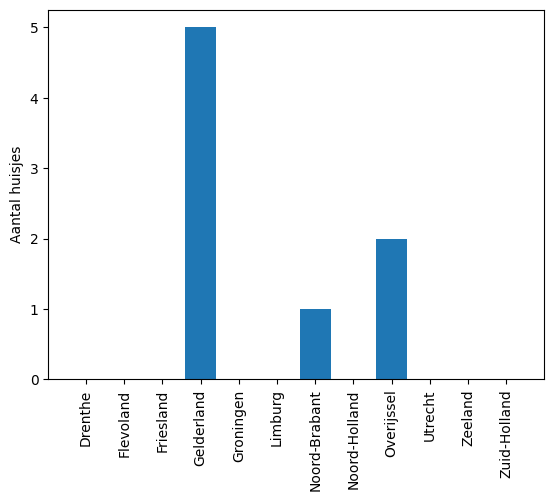

In [ ]:
plt.bar(huisjes_voorzieningen_woonplaatsen_provincies['provincie'], huisjes_voorzieningen_woonplaatsen_provincies['aantal_huisjes'])
plt.xticks(rotation=90)
plt.ylabel('Aantal huisjes')
plt.show()

Hier is te zien dat Gelderland de provincie is waar de meeste huisjes staan. Zoals in de eerste fase al beschreven had ik verwacht dat dit Noord-Holland zou zijn. Hierbij zat ik er wel flink naast: Noord-Holland is, ondanks zijn grootte, een van de provincies met het laagst aantal huisjes. Overigens zaten in de dataset geen huurbare huisjes uit Groningen, vandaar dat van deze provincie in dit staafdiagram geen data weergegeven wordt.

<b>Subconclusie:</b> Wat betreft het huisjesaanbod is niet Noord-Holland, maar Gelderland de beste provincie, gevolgd door Overijssel & Noord-Brabant.

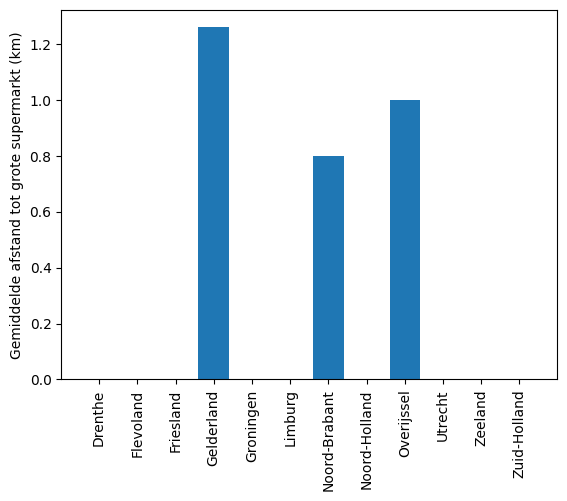

In [ ]:
plt.bar(huisjes_voorzieningen_woonplaatsen_provincies['provincie'], huisjes_voorzieningen_woonplaatsen_provincies['gemiddelde_afstand_tot_grote_supermarkt'])
plt.xticks(rotation=90)
plt.ylabel('Gemiddelde afstand tot grote supermarkt (km)')
plt.show()

Waar Gelderland de provincie was met de meeste huisjes zien we hier dat Zuid-Holland als winnaar uit de bus komt wat betreft de bereikbaarheid van supermarkten. Diens staaf is namelijk het laagst, ten teken dat de gemiddelde afstand tot een grote supermarkt per natuurhuisje het kleinst is. Dit is dus in overeenstemming met de eerder gestelde hypothese. Overigens zijn de verschillen tussen provincies wat minder groot dan bij de aantallen huisjes: Zuid-Holland wordt op de voet gevolgd door Utrecht en Friesland.

<b>Subconclusie:</b> Wat de bereikbaarheid van supermarkten betreft is Zuid-Holland, conform de gestelde hypothese, de beste provincie, op de voet gevolgd door Utrecht & Friesland.

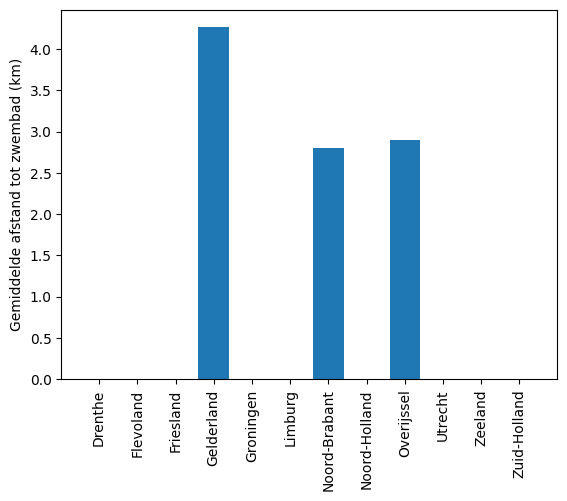

In [ ]:
plt.bar(huisjes_voorzieningen_woonplaatsen_provincies['provincie'], huisjes_voorzieningen_woonplaatsen_provincies['gemiddelde_afstand_tot_zwembad'])
plt.xticks(rotation=90)
plt.ylabel('Gemiddelde afstand tot zwembad (km)')
plt.show()

Ten derde blijkt ook hier mijn hypothese ("Zuid-Holland") te kloppen. Drenthe en Zeeland zijn by far de twee provincies met de meest "verre" zwembaden (met 10, respectievelijk 6.7, volgens de interactieve kaart). De rest cirkelt een beetje rond de 4 a 5, met Zuid-Holland als positieve uitschieter (2,6).

<b>Subconclusie:</b> Wat de bereikbaarheid van zwembaden betreft is Zuid-Holland wederom de beste provincie, nipt gevolgd door Noord-Brabant, Gelderland & Friesland.

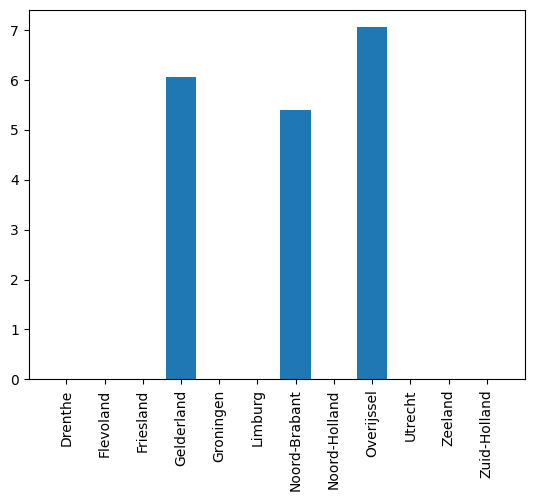

In [ ]:
plt.bar(huisjes_voorzieningen_woonplaatsen_provincies['provincie'], huisjes_voorzieningen_woonplaatsen_provincies['gemiddelde_afstand_tot_attractie'])
plt.xticks(rotation=90)
plt.show()

Toch is niet alles rozengeur en maneschijn voor Zuid-Holland, zo blijkt uit deze grafiek. In Friesland en Flevoland is de afstand tot attracties namelijk het laagst, daarna komt Zuid-Holland pas.

<b>Subconclusie:</b> Wat de bereikbaarheid van attracties betreft is niet Zuid-Holland, maar Friesland de beste provincie, met Flevoland op de tweede en Zuid-Holland pas op de derde plek.

## 4c: Beantwoording hoofdvraag en kanttekeningen

Op de vraag: <b>"In welke provincie kan je het beste een huisje huren?"</b> is geen eenduidig antwoord te geven. Gelderland heeft weliswaar de meeste huisjes, maar het is nog maar de vraag of er in die omgeving voldoende te doen is. Deze provincie kwam bij het berekenen van gemiddelde afstanden tot voorzieningen en uitjes namelijk niet als winnaar uit de bus. De meest levendige provincie is, conform verwachting en in zekere mate, Zuid-Holland. De keerzijde hiervan is dat dit de provincie is met een van de minste aangeboden aantallen huisjes. Vooralsnog zou ik op basis van deze analyses iedereen die de rust op wil zoeken en van de mooie Nederlandse natuur wil genieten aanraden naar Gelderland te gaan, terwijl mensen die juist op zoek zijn naar actieve activiteiten meer tot hun recht komen in Zuid-Holland.

2 kanttekeningen bij de uitkomsten van deze analyse en het bovenstaande doorlopen geautomatiseerde proces:
- Het is zeer waarschijnlijk dat bij het doorlopen van het script slechts een deel van de door natuurhuisje.nl aangeboden huisjes wordt ingeladen, aangezien dit een tijdrovend proces is (15 seconden per pagina met zoekresultaten) en gebruikers over het algemeen snelle resultaten willen kunnen zien.
- Ook de huisjes dié ingeladen zijn, zijn niet altijd in de uiteindelijke data-analyses terechtgekomen. Bij het "mergen" van de dataset van natuurhuisje.nl en die van het CBS waren er nogal veel mismatches tussen woonplaatsen. Hierdoor zijn er relatief nogal veel huisjes weggevallen.